# Regression Methods

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). Particularly, the case for just one explanatory variable is called simple linear regression. 

In this notebook you'll find an implementation of a regression models, such as Simple Linear Regression, Multiple Linear Regression and Logistic Regression.  Along our journey, we'll implement some code, explain and clarify some concepts about linear regression models.

For further studies on Linear Regression, see this [link](https://en.wikipedia.org/wiki/Linear_regression).
I also recommend for those who want to dig deeper in linear classifiers this [course](https://www.datacamp.com/courses/linear-classifiers-in-python) from the datacamp website.

## 1. Simple Linear Regression

The dataset used in this section is in a .csv file with GPA and SAT scores from some fictitious US students. We'll analyze this dataset and make a linear regression on the data in order to get some information about the performance of college students and how it is correlated with his/her SAT score.

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the data

In [2]:
path_name = r'C:\Users\alexa\Documents\Data Science Course - Bootcamp\Regression Analysis\datasets\1. Simple linear regression.csv'
data = pd.read_csv(path_name)

In [3]:
# Visualize your data
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
# Visualize some statistics about your data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## 1.1 Create your first regression

### Define the dependent and the independent variable

As we are trying to figure out how much the SAT score can predict a college student performance only by taking their GPA score. It is clear that the dependent variable, $y$, is the GPA scores and the independent variable, $x_1$, is the dependent variable. So, we split our dataset into these two classes.

In [5]:
y = data['GPA']
x1 = data['SAT']

### Explore the data

From the plot below, we can clearly see that there is a correlation (not necessarily causation) between the SAT score and the GPA score.

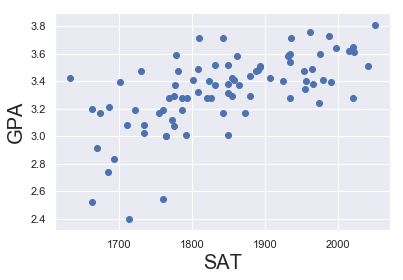

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Regression itself

For computational reasons, we must add a constant columns of 1's to the independent variable set so that our equation for regression is given by 

$$\hat{y} = b_0 \times 1 + b_1 \times x_1$$

then, we are free to apply the Ordinary Least Square method to our data and finally fit our model.

Lastly, it is a good practice to summarize the results in order to get some insights about the model like the relevance of the features and how good our model fits the data.

In [7]:
x = sm.add_constant(x1)

In [8]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           7.20e-11
Time:                        09:39:10   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now that we have fitted the linear regression model to our data, it is time to visualize the outcomes. First of all, Let's have a look at the table below. Tipically, everytime we use statsmodels we'll have three main tables, namely:

    1. Model Summary Table
    2. Coefficients Table
    3. Additional Tests Table

The composition of all these tables is called regression table and it provides useful insights about our model. We will cover all of it along this notebook but for now, we'll focus only in some records of it.

at the Coefficients Table, look at the _coef_'s column. it has 2 values, these are the coefficients $b_0$ (const) and $b_1$ (SAT) of the regression model, which means that the equation that fits better our data is given by

$$ \hat{y} = 0.2750 + 0.0017 x_1 $$

Below, it is shown a plot of this equation over the data points. It is clearly a good prediction over the provided data, but we'll explore some statistical evidences of that soon enough.

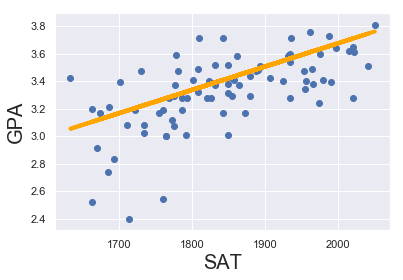

In [9]:
plt.scatter(x1,y)
yhat = 0.2750 + 0.0017*x1
fig1 = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.savefig('linear.png')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## 2. What are the determinants of a good regression?

It is time to explore the other records of the coefficients table. You can skip this section and go straight to the next section about Multiple Linear Regression, but is in this section that we build the foundations for a better understanding about the performance of a regression model.

Let's use the results of our last model. The _std err_ column shows the accuracy of prediction for each variable, the lower the standard error, the better the estimate. In other words, **the standard error tells us how much our regression model is most likely to make a wrong prediction**. 

Below, it is possible to visualize two red lines encapsulating almost all data points inside the range:

$$[b_0 - std\_err + b_1 x_1, b_0 + std\_err + b_1 x_1]$$

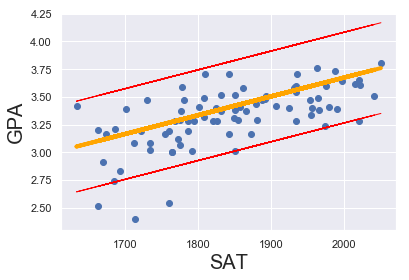

In [10]:
plt.scatter(x1,y)
yhat = 0.2750 + 0.0017*x1
fig2 = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')

upper_line = 0.2750 + 0.409 + 0.0017*x1
fig3 = plt.plot(x1,upper_line, lw=1, c='red', label = 'Upper line')

lower_line = 0.2750 - 0.409 + 0.0017*x1
fig4 = plt.plot(x1,lower_line, lw=1, c='red', label = 'Lower line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

The next two columns are for the t-statistics and its p-value. Without digging deeper into these matters, it's worth noting that there is a hypothesis involved here. The **Null Hypothesis** of this test is $ H_0 : b = 0$. In other words, is the coefficient equals to zero?

**Essentially, these columns are trying to tell us if a variable is useful or not to our model**. Conveniently, the answer is contained in the p-value column. In statistics, a $p-value < 0.05$ means that the variable is significant to our model performance. 

Therefore, a p-value of 0.503 to the const coefficient indicates that the constant variable is not significant to our model. This can be justified by the fact that we are only trying to capture the relationship between the SAT and the GPA score. For the SAT variable, a p-value of 0.000 tells us that the SAT score is a significant variable when predicting college GPA.

### Variability: How powerful is our model?

So far, we analyzed the coefficients table only, it is now time to go further and have a look at the first table.

The model summary table holds a bunch of important information, there are some self explanatory variables, like the dependent variable of the model, the model and the method and so on. However, we will talk about the **R-squared** now.

The R-squared variable is a relative measure that takes values from range $[0, 1]$. A R-squared of 0 means that your regression line explains none of the variability of the data. Conversely, a R-squared of 1 implies that your regression line explains all the variability of the data. But be careful now!

In our simple linear regression model we obtained a R-squared equals to 0.406. Is that a good result? Well, it may be. A low R-squared value implies that the SAT score is not enough to capture all the variability of our data. Other variables such as gender, income and marital status could provide more information to our model.

## 3. Multiple linear regression

In real world problems we need more than one variable to get a good accuracy score in our predictions. As we saw in the last section, the SAT score explained some variability of the dataset but it was not capable of capture all its variation. 

Usually we need to add two or more factors to our model in order to explain the variability of some processes. For instance, take the price of a house as a dependent variable of a regression model. We could use the size of the house as the independent variable but it won't capture all the variability of houses prices. A good choice would be to add its location, some additional information like the quantity of rooms, has or not a pool and so on...

This would be an example of a _Multiple linear regression_. The linear regression equation is as follows:

$$\hat{y} = b_0 + b_1 x_1 + b_2 x_2 +...+ b_k x_k$$

there isn't much to explain about this equation as it is only a generalization of the equation for a simple linear regression.

### How many variables are sufficient to our model? 

To answer this question, let's get our hands dirty with our first multiple linear regression model. Initially, we must load the dataset into the kernel.

In [11]:
path_name = r'C:\Users\alexa\Documents\Data Science Course - Bootcamp\Regression Analysis\datasets\2. Multiple linear regression.csv'
data = pd.read_csv(path_name)

In [12]:
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


As you can see, this time we'll be addressing the same problem of predict GPA score with the SAT score plus a random variable that ranges from 1 to 3. This random variable is useless to our model, as it not explains none of the variability of the dependent variable. We just added it here to make a point. With that, the equation of our model is given by

$$\hat{y} = b_0 + b_1 x_1 + b_2 x_2$$

In [13]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [14]:
x = sm.add_constant(x1)

In [15]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 12 Feb 2019   Prob (F-statistic):           6.58e-10
Time:                        09:39:11   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's compare the results obtained for this model and our first model. Below, we have a table showing a comparison between the R-squared values of each model and also the Adjusted R-squared.
______________________________________________________
| Measure      | Simple lin. reg.| Multiple lin. reg |
|--------------|-----------------|-------------------|
| R-squared    |0.406            | 0.407             |
|Adj. R-squared|0.399            | 0.392             |

Look how the R-squared almost changed nothing in both cases, this implies that the addition of the _random_ independent variable did not improved the explanatory power of our model. On the other hand, we have a even more interesting result when looking at the Adj. R-squared variable.

The **Adjusted R-squared** variable is always less than the R-squared. This new outcome **penalizes excessive use of variables in the models that have no strong explanatory power**. We will not dig deeper into the mathematical details about the Adj. R-squared. However, look at how the value for the Multiple lin. reg. model is lower than for the Simple lin. reg., this is an evidence that the addition of the _random_ variable is not significant to our model.

Indeed, in a more accurate analysis, if you look at the coefficient table it becomes clear that the _random_ variable is useless to our model. It has a p-value = 0.762, meaning that we cannot reject the null hypothesis ($H_0 : b_2 = 0$) at a 76% significance level. This is incredibly high!

Another tool that allows us comparing models is the **F-statistic**. The F-statistic follows an [F-distribution](https://en.wikipedia.org/wiki/F-distribution). In other words, there is a hypothesis test here! The test is known for the overall significance of the model. The null Hypothesis is $H_0 : b_0 = b_1 =$ ... $= b_n = 0$ and the alternative hypothesis is $H_1 : b_i \neq 0$, that is, at least one coefficient is different from zero. 

**What is the interpretation?** if all $b$'s are zero, then none of the independent variables matter. Therefore, our model has no merit. See the comparison between the F-statistic and its p-value for the two models.

___________________________________________________________
| Measure           | Simple lin. reg.| Multiple lin. reg |
|-------------------|-----------------|-------------------|
| F-statistic       |56.05            | 27.76             |
|Prob (F-statistic) |7.20e-11         | 6.58e-10          |

The p-value of the F-statistic for both models is virtually zero, meaning that our model significantly explains the variability of the data. On the other hand, the F-statistic for the Multiple linear regression is half the value. The lower the F-statistic, the closer to a non-significant model.

The point is: cherry pick your data when performing a linear regression. Adding new variables does not necessarily implies in increasing the explainability power of the model.

## 4. Assumptions for Linear Regression

So far, we introduced quite a few notions about regression. Still, for which cases can we perform a linear regression? This section aims to answer this question. As the purpose of this kernel is to provide a better understading about regression, it is important for you not to skip this section. It is important to know all the regression assumptions and consider them before you perform regression analysis. The regression assumptions are:

    1. Linearity
    2. No endogeneity
    3. Normality and homoscedasticity
    4. No autocorrelation
    5. No multicolinearity

All these assumptions will be explained in the next sections.

### 4.1 Linearity

The linear regression is the simplest non-trivial relationship. It is called linear because the regression equation is linear! How can you verify if the relation between two variables is linear?

The easiest way is to choose an independent variable and plot it against the dependent variable on a scatter plot just like the SAT _vs._ GPA plot

<img src="linear.png">

On the other hand, examine the following plot. There is no straight line that can fit appropriately to the data points. In this case, a curve line expresses more accurately the data variability. Therefore, it is not recommended to perform a linear regression to this data.

<img src="quadratic.png">

There are easy ways to fix non-linearity such as

    1. Run a non-linear regression
    2. Apply and exponential transformation
    3. Apply a logarithmical transformation
    
As we are just highlighting the Linear regression assumptions, we will not explore these tools here. What you need to know is that whenever you intend to perform a linear regression, try to see if it is possible! 

If the data can not be fitted by a straight line, try to make a transformation and then perform linear regression!

### 4.2 No endogeneity

The second assumption is the so-called no endogeneity of regressors. It refers to the prohibition of a link between independent variables and the errors mathematically expressed by the following equation

$$ \sigma_{X\epsilon} = 0 : \forall x, \epsilon$$

This equations is telling us that the error (the difference between the observed and the predicted values) must not be correlated with any independent variables. This is a problem referred to as _omitted variable bias_. This problem arises when we forget to include a crucial variable in the model. Consider the following case:

the $y$ variable is explained by the $x$ variable and also by a $x^{*}$ variable that was omitted in the model. Chances are that $x$ is correlated to $x^{*}$. However, we did not include it as a regressor. Everything that is not explained by the model goes into the error. So, actually, the error becomes correlated with everything else.
______

Let's try another example. Suppose we are trying to predict the price, $y$, of an apartment building, in New York City by using only its size, $x$, as a regressor. Then, we obtained the following equation from the model:

$$y = 890345 - 48947 x$$

The yielded result is extremely counterintuitive as we expect that the higher the price, the more expensive the apartment. This implies that the covariance between the independent variable and the error is different from zero ($\sigma_{X\epsilon} \neq 0$). Critical thinking time! you can ask yourself questions like:

    1. Where do I draw the sample from?
    2. Can I get a better sample?
    3. Why is bigger real estate cheaper?
    
Let's consider the following: The sample comprises apartment buildings in central New York and is large enough so the problem is not with the sample. Remember that the we are in New York! The place with some of the most valuable real estate in the world! we ommitted the exact location as a variable. In almost any other city, this factor would not be such a huge headache for us. But in our particular example, the million dolar suits in the city of New York turn things around. After we add this variable we may get a result like:

$$y = 54209 + 37892 x_{size} + 78234 x_{city}$$

which looks amazing! Larger properties are more expensive!

The lesson here is: advanced knowledge in the subject is helpful! If you do not understand your problem, you can fall into the endogeneity problem.

### 4.2 Normality and Homoscedasticity